In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#load dataset
dataset = pd.read_csv('./cannabisGrowthRaw2020.csv')
dataset.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,good


In [3]:
#Overview of Characteristics of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
PMCno       1458 non-null float64
DBH         1470 non-null float64
Ht          1470 non-null float64
Surv        1284 non-null float64
Vig         1334 non-null float64
Ins_res     1334 non-null float64
Stem_Fm     1334 non-null float64
Crown_Fm    1334 non-null float64
Brnch_Fm    1334 non-null float64
Utility     1472 non-null object
dtypes: float64(9), object(1)
memory usage: 115.1+ KB


In [4]:
#Charateristics of Data
dataset.describe()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
count,1458.000000,1470.000000,1470.000000,1284.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,2136.977366,75.865518,9.674565,62.059579,3.159520,2.966417,3.083208,3.282159,2.905547
std,648.661372,1614.500903,4.297192,32.247227,1.041356,0.838065,0.760061,0.778459,0.811572
min,1.000000,0.580000,1.000000,1.500000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1595.000000,8.600000,6.145000,38.000000,2.500000,2.500000,3.000000,3.000000,2.500000
50%,2426.000000,15.000000,9.285000,66.000000,3.000000,3.000000,3.000000,3.300000,3.000000
75%,2656.000000,21.982500,12.300000,88.000000,4.000000,3.500000,3.700000,4.000000,3.300000
max,3537.000000,45452.000000,24.000000,108.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#Replacing ? with 0
dataset.replace(['?'],['0'], inplace=True)
dataset

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,good
5,1644.0,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,best
6,1643.0,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,good
7,1645.0,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,best
8,1646.0,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,average
9,1647.0,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,good


In [6]:
#Coverting columns to float using  .astype()
dataset['PMCno'] = dataset.PMCno.astype(float)
dataset['DBH'] = dataset.DBH.astype(float)
dataset['Ht'] = dataset.Ht.astype(float)
dataset['Surv'] = dataset.Surv.astype(float)
dataset['Vig'] = dataset.Vig.astype(float)
dataset['Ins_res'] = dataset.Ins_res.astype(float)
dataset['Stem_Fm'] = dataset.Stem_Fm.astype(float)
dataset['Crown_Fm'] = dataset.Crown_Fm.astype(float)
dataset['Brnch_Fm'] = dataset.Brnch_Fm.astype(float)

In [7]:
#Count and percent of missing data 
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Surv,188,0.127717
Brnch_Fm,138,0.093750
Crown_Fm,138,0.093750
Stem_Fm,138,0.093750
Ins_res,138,0.093750
Vig,138,0.093750
PMCno,14,0.009511
Ht,2,0.001359
DBH,2,0.001359
Utility,0,0.000000


In [8]:
#Combine Classes
dataset.Utility = [x if x == 'best' else 'other' for x in dataset.Utility]


In [9]:
#Convert into binomial and dummy with Class 0 and Class 1
dataset.Utility[dataset.Utility == 'best'] = 1
dataset.Utility[dataset.Utility =='other'] = 0

dataset['Utility'] = dataset.Utility.astype(int)

dataset.head()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,0
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,1
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,0
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,0
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,0


In [10]:
#Replacing NaN values from PMCno, DBH and Surv with median value
NaN_replace=['PMCno','DBH','Surv','Ht']
for column in NaN_replace:
    median = dataset[column].median(skipna=True)
    dataset[column] = dataset[column].replace(np.NaN, median)

In [11]:
#Looking for rows with more than 50% attributes having NaN values
#Reserving it for validation set
dataset[pd.isnull(dataset).any(axis=1)]
dataset[dataset.Vig.isnull()  & dataset.Surv.isnull() & dataset.Ins_res.isnull()  & dataset.Stem_Fm.isnull()  & dataset.Crown_Fm.isnull()  & dataset.Brnch_Fm.isnull()]

dataset1 = dataset


In [12]:
#Dropping rows with more than 50% attribute value missing
dataset1.dropna(subset=['Vig','Ins_res','Stem_Fm','Crown_Fm','Brnch_Fm'], how='all', inplace=True)
dataset1

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,0
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,1
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,0
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,0
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,0
5,1644.0,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,1
6,1643.0,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,0
7,1645.0,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,1
8,1646.0,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,0
9,1647.0,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,0


In [13]:
#Print dataset
dataset1

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,0
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,1
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,0
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,0
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,0
5,1644.0,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,1
6,1643.0,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,0
7,1645.0,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,1
8,1646.0,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,0
9,1647.0,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,0


C:\Users\Prachi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Prachi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Prachi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Prachi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecatio

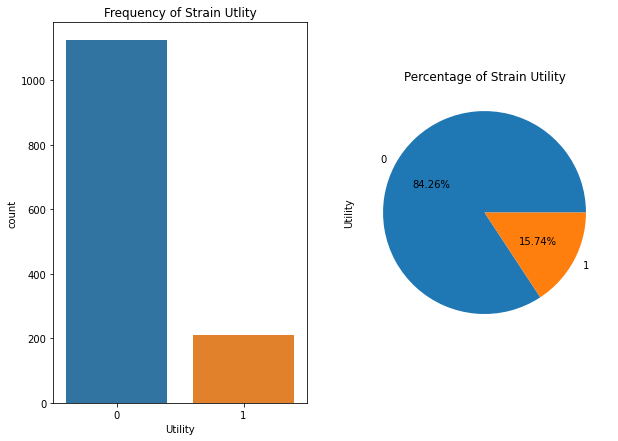

In [14]:
#Visualizing distribution of data
# 0 - Other
# 1 -Best
fig, axs = plt.subplots(1,2,figsize=(10,7))
sns.countplot(x='Utility',data=dataset1, ax=axs[0])
axs[0].set_title("Frequency of Strain Utlity")
dataset1.Utility.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of Strain Utility")
plt.show()

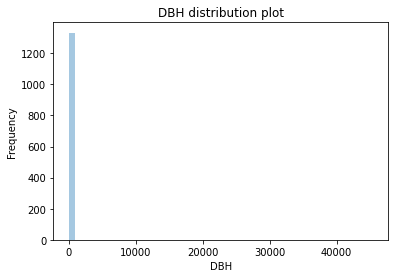

In [15]:
#Histogram plot for DBH
sns.distplot(dataset1['DBH'],kde = False)
plt.title('DBH distribution plot')
plt.xlabel('DBH')
plt.ylabel('Frequency')
plt.show()

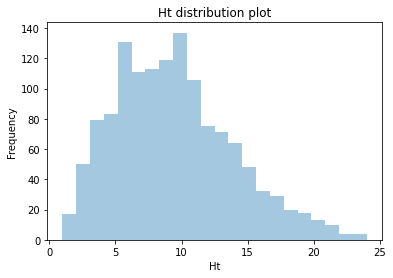

In [16]:
#Histogram plot for Ht
sns.distplot(dataset1['Ht'],kde = False)
plt.title('Ht distribution plot')
plt.xlabel('Ht')
plt.ylabel('Frequency')
plt.show()

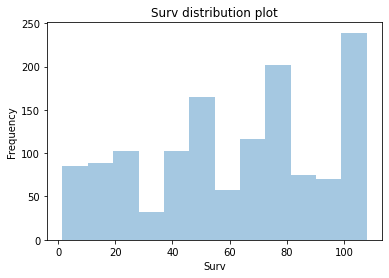

In [17]:
#Histogram plot for Surv
sns.distplot(dataset1['Surv'],kde = False)
plt.title('Surv distribution plot')
plt.xlabel('Surv')
plt.ylabel('Frequency')
plt.show()

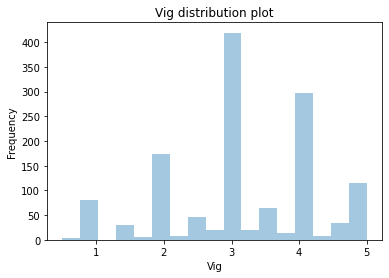

In [18]:
#Histogram plot for Vig
sns.distplot(dataset1['Vig'],kde = False)
plt.title('Vig distribution plot')
plt.xlabel('Vig')
plt.ylabel('Frequency')
plt.show()

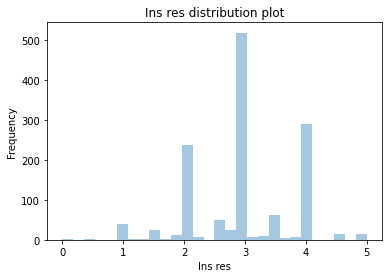

In [19]:
#Histogram plot for Ins_res
sns.distplot(dataset1['Ins_res'],kde = False)
plt.title('Ins res distribution plot')
plt.xlabel('Ins res')
plt.ylabel('Frequency')
plt.show()

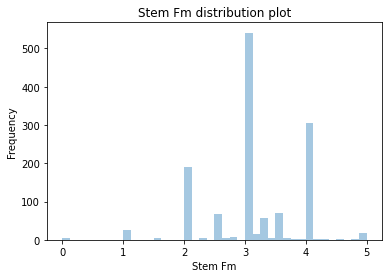

In [20]:
#Histogram plot for Stem_Fm
sns.distplot(dataset1['Stem_Fm'],kde = False)
plt.title('Stem Fm distribution plot')
plt.xlabel('Stem Fm')
plt.ylabel('Frequency')
plt.show()

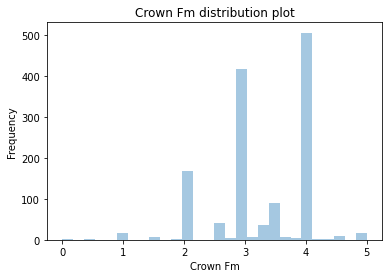

In [21]:
#Histogram plot for Crown_Fm
sns.distplot(dataset1['Crown_Fm'],kde = False)
plt.title('Crown Fm distribution plot')
plt.xlabel('Crown Fm')
plt.ylabel('Frequency')
plt.show()

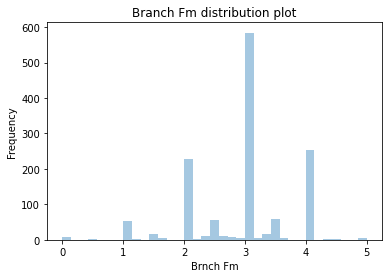

In [22]:
#Histogram plot for Brnch_Fm
sns.distplot(dataset1['Brnch_Fm'],kde = False)
plt.title('Branch Fm distribution plot')
plt.xlabel('Brnch Fm')
plt.ylabel('Frequency')
plt.show()

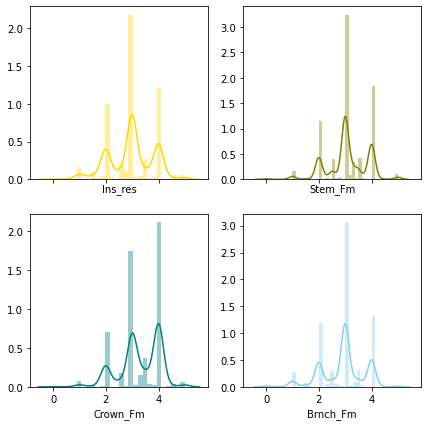

In [23]:
#Visualisation
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( dataset1["Brnch_Fm"] , color="skyblue", ax=axes[1, 1],axlabel="Brnch_Fm")
sns.distplot( dataset1["Stem_Fm"] , color="olive", ax=axes[0, 1],axlabel="Stem_Fm")
sns.distplot( dataset1["Ins_res"] , color="gold", ax=axes[0, 0],axlabel="Ins_res")
sns.distplot( dataset1["Crown_Fm"] , color="teal", ax=axes[1, 0],axlabel="Crown_Fm")
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


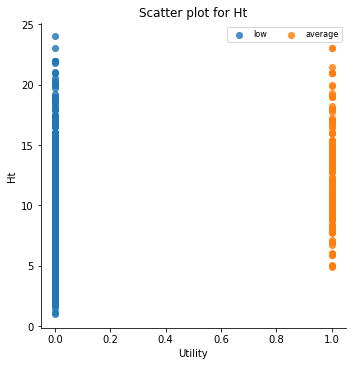

In [24]:
#Scatterplot for Utility and Ht
sns.lmplot( x="Utility", y="Ht", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Ht')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


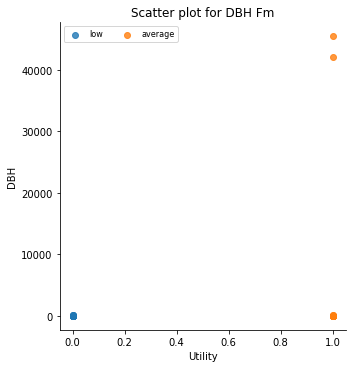

In [25]:
#Scatterplot for Utility and DBH
sns.lmplot( x="Utility", y="DBH", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for DBH Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


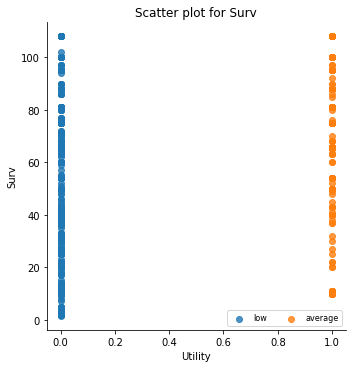

In [26]:
#Scatterplot for Utility and Surv
sns.lmplot( x="Utility", y="Surv", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Surv')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


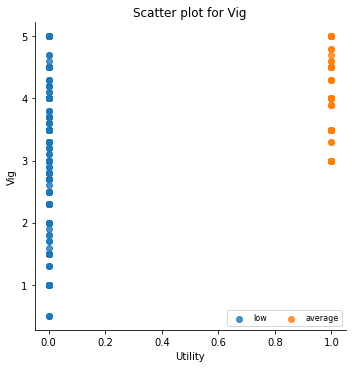

In [27]:
#Scatterplot for Utility and Vig
sns.lmplot( x="Utility", y="Vig", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Vig')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


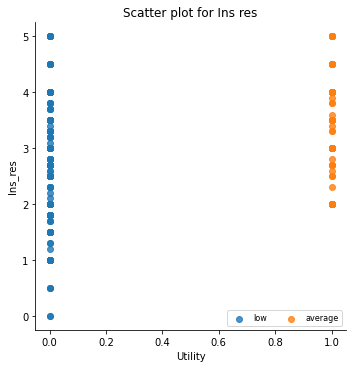

In [28]:
#Scatterplot for Utility and Ins_res
sns.lmplot( x="Utility", y="Ins_res", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Ins res')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


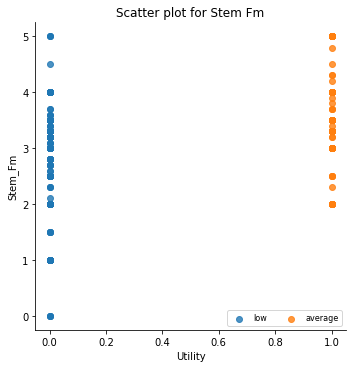

In [29]:
#Scatterplot for Utility and Stem_Fm
sns.lmplot( x="Utility", y="Stem_Fm", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Stem Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


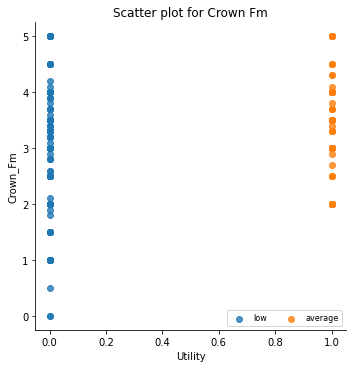

In [30]:
#Scatterplot for Utility and Crown_Fm
sns.lmplot( x="Utility", y="Crown_Fm", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Crown Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


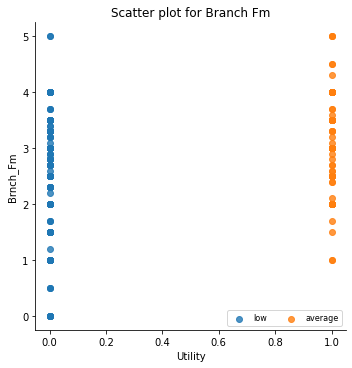

In [31]:
#Scatterplot for Utility and Brnch_Fm
sns.lmplot( x="Utility", y="Brnch_Fm", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Branch Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Prachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Prachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Prachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


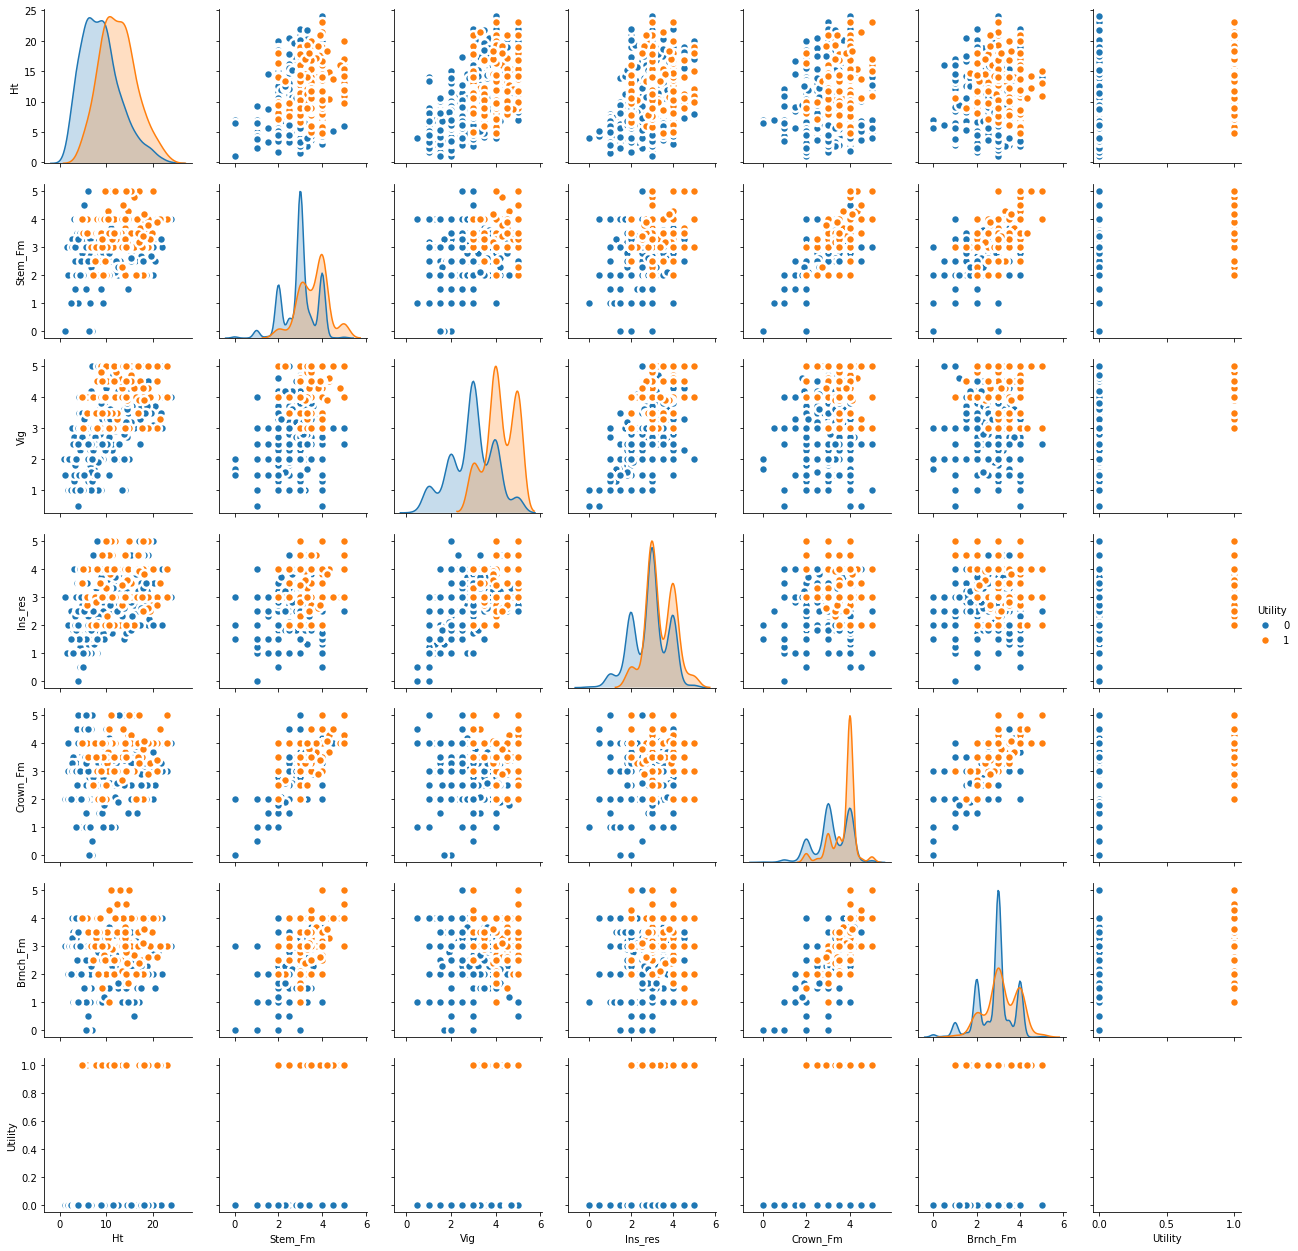

In [32]:
#Scatterplot Graph
dataframe = pd.DataFrame(dataset1,columns=['Ht','Stem_Fm', 'Vig','Ins_res','Crown_Fm','Brnch_Fm','Utility'])

sns.pairplot(dataframe, kind="scatter", hue="Utility", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


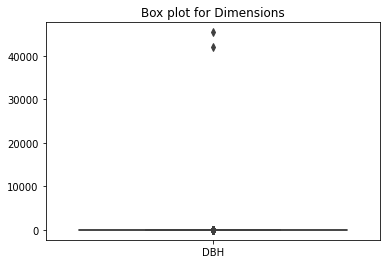

In [33]:
#Boxplot for DBH
sns.boxplot(data=dataset1.ix[:,1:2])
plt.title('Box plot for Dimensions')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


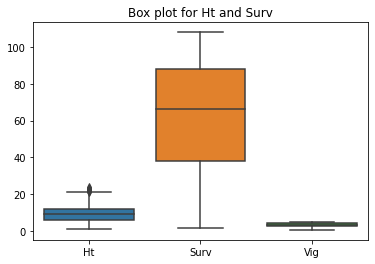

In [34]:
#Boxplot for Features - Ht, Surv and Vig
sns.boxplot(data=dataset1.ix[:,2:5])
plt.title('Box plot for Ht and Surv')
plt.show()


C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


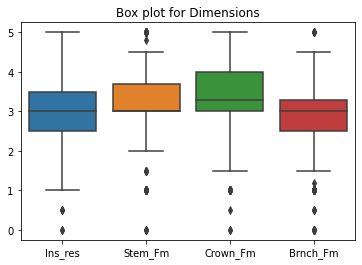

In [35]:
#Boxplot for Dimensions - Ins_res, Stem_Fm, Crown_Fm and Brnch_Fm
sns.boxplot(data=dataset1.ix[:,5:9])
plt.title('Box plot for Dimensions')
plt.show()

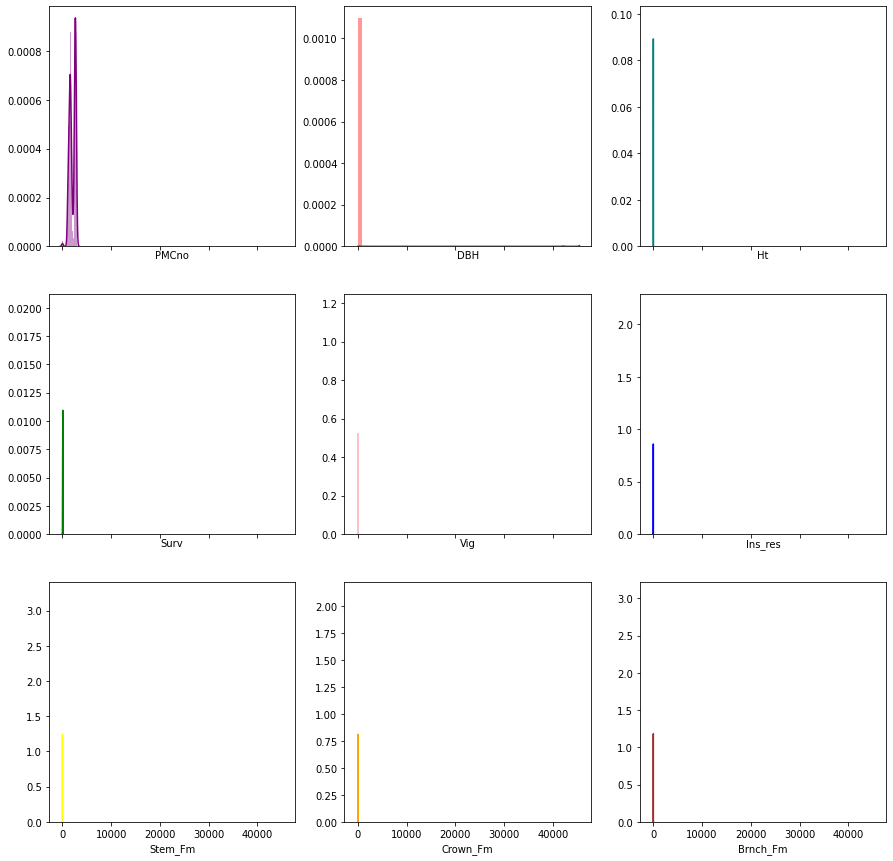

In [36]:
#Distribution
f, axes = plt.subplots(3,3, figsize=(15,15),sharex=True)
f.canvas.set_window_title('Distributions')
sns.distplot(dataset1['PMCno'],color="purple",ax=axes[0,0])
sns.distplot(dataset1['DBH'],color="red",ax=axes[0,1])
sns.distplot(dataset1['Ht'],color="teal",ax=axes[0,2])
sns.distplot(dataset1['Surv'],color="green",ax=axes[1,0])
sns.distplot(dataset1['Vig'],color="pink",ax=axes[1,1])
sns.distplot(dataset1['Ins_res'],color="blue",ax=axes[1,2])
sns.distplot(dataset1['Stem_Fm'],color="yellow",ax=axes[2,0])
sns.distplot(dataset1['Crown_Fm'],color="orange",ax=axes[2,1])
sns.distplot(dataset1['Brnch_Fm'],color="brown",ax=axes[2,2])

In [37]:
#Identify Correlated Columns
def correlation(dataset1,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset1.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name
    return col_corr #returning set of column names
col=correlation(dataset1.drop('Utility',axis=1),0.8)
print('Correlated columns:',col)

Correlated columns: set()


In [38]:
dataset1.corr()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
PMCno,1.000000,-0.025039,0.202436,-0.087315,0.117398,0.146605,0.138513,0.159380,0.123654,0.044905
DBH,-0.025039,1.000000,0.075959,-0.026138,0.032779,0.047894,0.001598,0.019276,-0.010438,0.091144
Ht,0.202436,0.075959,1.000000,-0.111570,0.588037,0.379381,0.325049,0.191776,-0.035281,0.305691
Surv,-0.087315,-0.026138,-0.111570,1.000000,0.208310,-0.142252,0.047763,0.044428,0.111095,0.149684
Vig,0.117398,0.032779,0.588037,0.208310,1.000000,0.515951,0.353698,0.172327,-0.042581,0.436983
Ins_res,0.146605,0.047894,0.379381,-0.142252,0.515951,1.000000,0.264880,0.228726,0.050526,0.217813
Stem_Fm,0.138513,0.001598,0.325049,0.047763,0.353698,0.264880,1.000000,0.711281,0.562083,0.304572
Crown_Fm,0.159380,0.019276,0.191776,0.044428,0.172327,0.228726,0.711281,1.000000,0.678071,0.252726
Brnch_Fm,0.123654,-0.010438,-0.035281,0.111095,-0.042581,0.050526,0.562083,0.678071,1.000000,0.142168
Utility,0.044905,0.091144,0.305691,0.149684,0.436983,0.217813,0.304572,0.252726,0.142168,1.000000


In [39]:
#Correlation graph
corr=dataset1.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '120px', 'font-size': '12pt'})\
    .set_precision(2)\

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
PMCno,1,-0.025,0.2,-0.087,0.12,0.15,0.14,0.16,0.12,0.045
DBH,-0.025,1,0.076,-0.026,0.033,0.048,0.0016,0.019,-0.01,0.091
Ht,0.2,0.076,1,-0.11,0.59,0.38,0.33,0.19,-0.035,0.31
Surv,-0.087,-0.026,-0.11,1,0.21,-0.14,0.048,0.044,0.11,0.15
Vig,0.12,0.033,0.59,0.21,1,0.52,0.35,0.17,-0.043,0.44
Ins_res,0.15,0.048,0.38,-0.14,0.52,1,0.26,0.23,0.051,0.22
Stem_Fm,0.14,0.0016,0.33,0.048,0.35,0.26,1,0.71,0.56,0.3
Crown_Fm,0.16,0.019,0.19,0.044,0.17,0.23,0.71,1,0.68,0.25
Brnch_Fm,0.12,-0.01,-0.035,0.11,-0.043,0.051,0.56,0.68,1,0.14
Utility,0.045,0.091,0.31,0.15,0.44,0.22,0.3,0.25,0.14,1


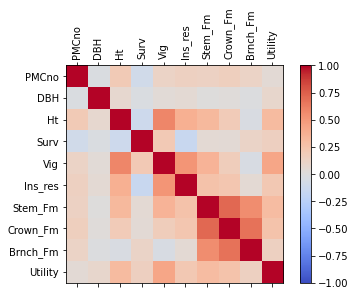

In [40]:
#Heat Map for Features and Dimensions
corr = dataset1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()


In [41]:
#Reindexing
dataset2 = dataset1.reset_index(drop=True)

In [42]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset2.drop('Utility',axis=1),0,list(dataset2.drop('Utility',axis=1)))
dataset2.loc[Outliers_to_drop]

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
41,1644.0,43.000,15.00,66.0,5.0,4.0,4.0,3.0,2.0,1
52,1645.0,43.000,11.00,66.0,4.0,5.0,3.0,3.0,1.0,1
70,1606.0,41.000,14.00,11.0,5.0,4.0,2.0,2.0,1.0,0
287,2620.0,58.000,5.00,108.0,3.0,4.0,3.0,3.0,3.0,0
333,2752.0,44.000,18.00,54.0,4.0,3.0,2.0,2.0,2.0,0
371,2752.0,45.000,16.00,27.0,3.0,3.0,2.0,2.0,1.0,0
375,2773.0,52.000,20.00,14.0,4.0,3.0,2.0,2.0,2.0,0
574,1719.0,47.000,19.00,22.0,5.0,5.0,4.0,4.0,3.0,1
579,1601.0,41.000,18.00,11.0,4.0,4.0,4.0,4.0,4.0,1
581,2751.0,40.000,19.00,43.0,5.0,3.0,4.0,3.0,2.0,0


In [43]:
#Create New Dataset without Outliers
good_data = dataset2.drop(dataset2.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
PMCno       1176 non-null float64
DBH         1176 non-null float64
Ht          1176 non-null float64
Surv        1176 non-null float64
Vig         1176 non-null float64
Ins_res     1176 non-null float64
Stem_Fm     1176 non-null float64
Crown_Fm    1176 non-null float64
Brnch_Fm    1176 non-null float64
Utility     1176 non-null int32
dtypes: float64(9), int32(1)
memory usage: 87.4 KB


In [45]:
#Create X and Y variables
x = dataset2.drop('Utility', axis =1).values
y = dataset2['Utility'].values

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

In [46]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [47]:
#Prepare Models 
import xgboost as xgb
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression

Model Evaluation - Recall Score
Logistic Regression 0.78 +/- 0.03
Random Forest 0.90 +/- 0.02
Bagging Classifier 0.89 +/- 0.03
AdaBoost 0.88 +/- 0.03
GBC 0.90 +/- 0.02
XGB 0.89 +/- 0.02




C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


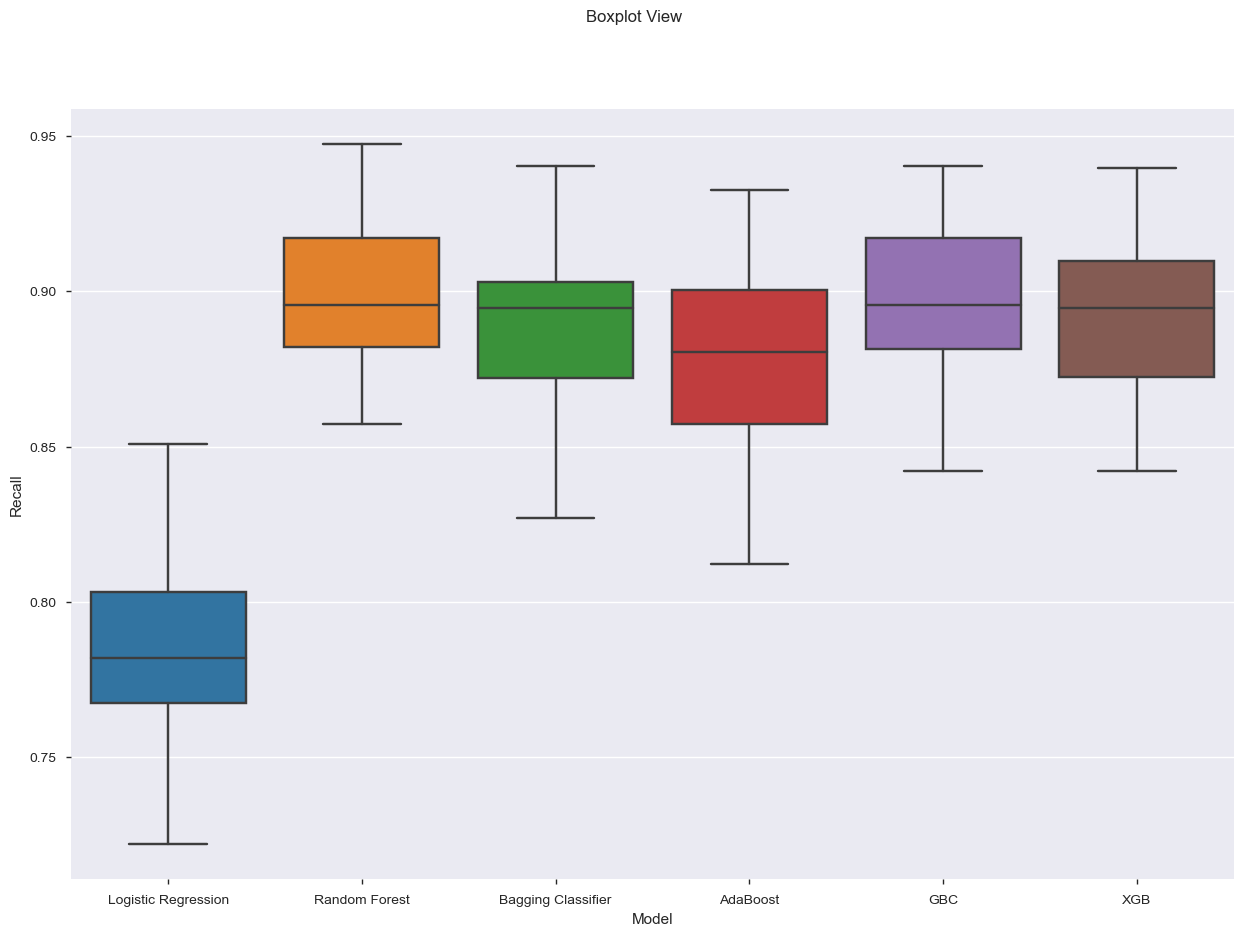

In [48]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',
                                                        class_weight='balanced',
                                                        random_state=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('Bagging Classifier',BaggingClassifier(random_state=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=100)))
models.append(('GBC',GradientBoostingClassifier(random_state=100)))
models.append(('XGB',XGBClassifier(random_state=100)))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

Model Evaluation - Precision Value
Logistic Regression 0.87 +/- 0.03
Random Forest 0.89 +/- 0.02
Bagging Classifier 0.88 +/- 0.03
AdaBoost 0.87 +/- 0.03
GBC 0.89 +/- 0.03
XGB 0.88 +/- 0.03




C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


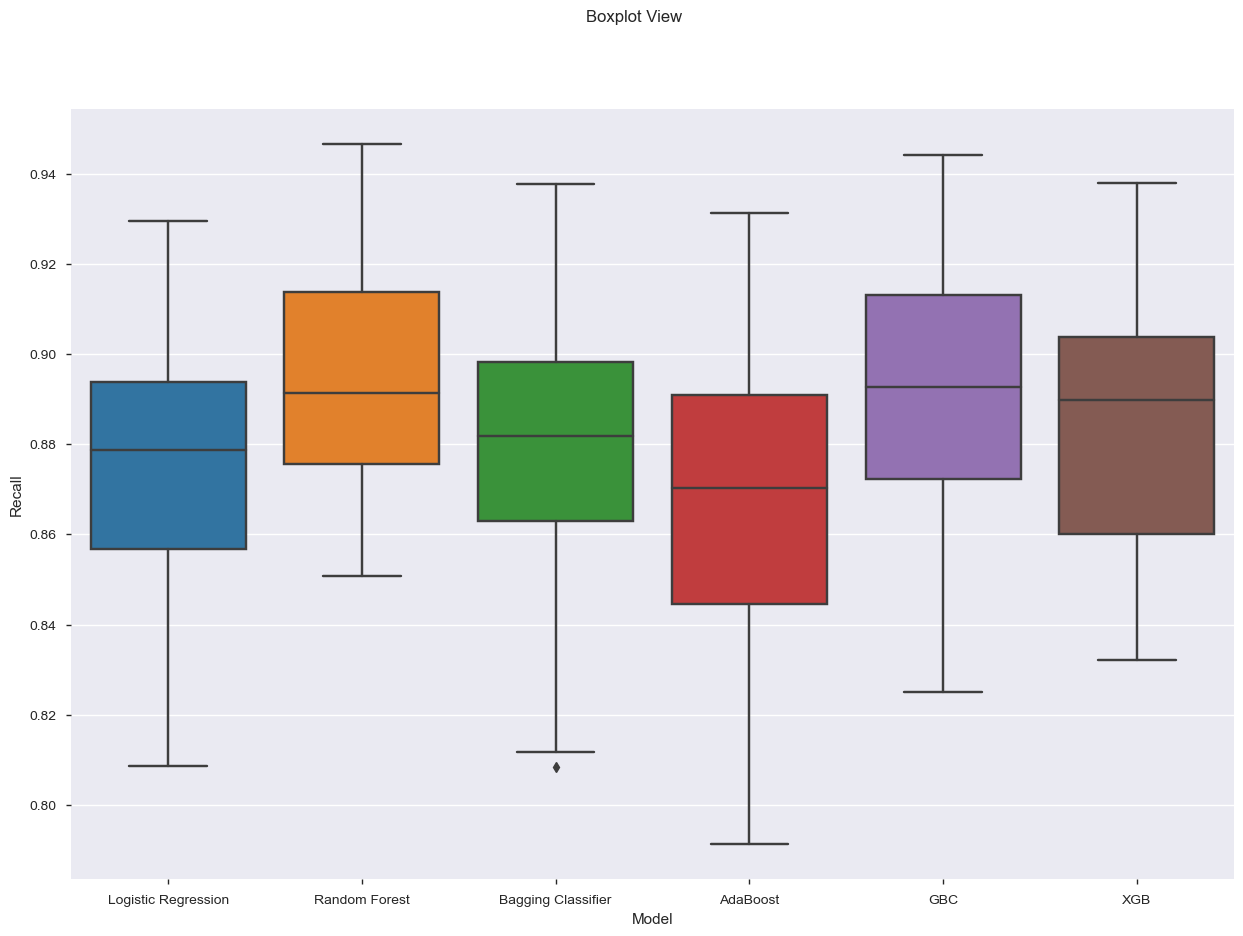

In [49]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',
                                                        class_weight='balanced',
                                                        random_state=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('Bagging Classifier',BaggingClassifier(random_state=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=100)))
models.append(('GBC',GradientBoostingClassifier(random_state=100)))
models.append(('XGB',XGBClassifier(random_state=100)))

#Model Evaluation
results =[]
names=[]
scoring ='precision_weighted'
print('Model Evaluation - Precision Value')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

Model Evaluation - Accuracy Score
Logistic Regression 0.78 +/- 0.03
Random Forest 0.90 +/- 0.02
Bagging Classifier 0.89 +/- 0.03
AdaBoost 0.88 +/- 0.03
GBC 0.90 +/- 0.02
XGB 0.89 +/- 0.02




C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


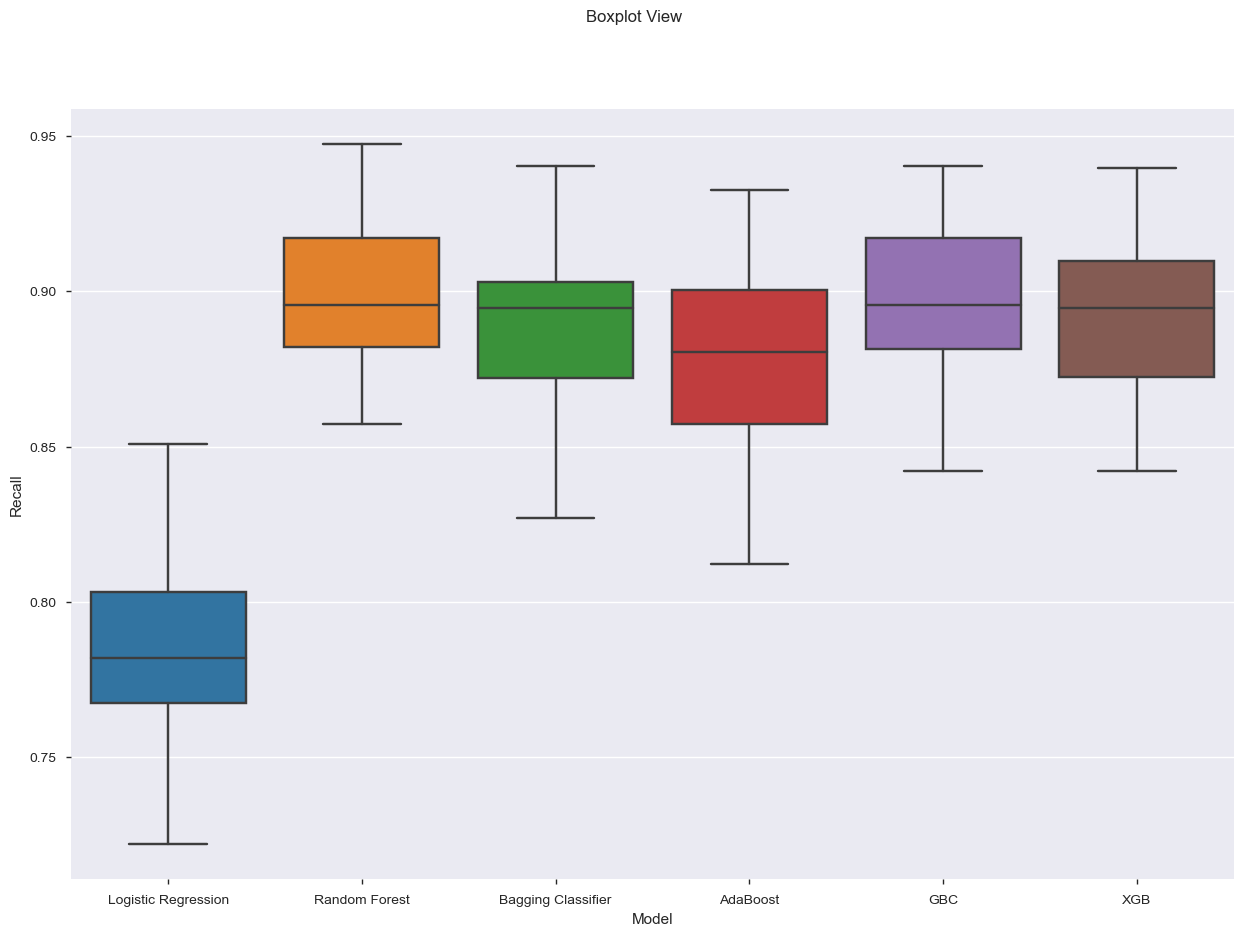

In [50]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',
                                                        class_weight='balanced',
                                                        random_state=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('Bagging Classifier',BaggingClassifier(random_state=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=100)))
models.append(('GBC',GradientBoostingClassifier(random_state=100)))
models.append(('XGB',XGBClassifier(random_state=100)))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [65]:
#Random Forest Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [ ('RDF',RandomForestClassifier())]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))   


Estimator: RDF
[[150  75]
 [  2  40]]
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       225
           1       0.35      0.95      0.51        42

    accuracy                           0.71       267
   macro avg       0.67      0.81      0.65       267
weighted avg       0.89      0.71      0.75       267



In [52]:
#Import Model
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(0,pipe_rdf)

pipe_gbc = Pipeline([('scl', StandardScaler()),
                    ('clf', GradientBoostingClassifier(random_state=100))])
pipeline.insert(1,pipe_gbc)


# Set grid search params 

modelpara =[]

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(0,param_gridrdf)

max_depth = range(1,100)


In [54]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='accuracy',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()


Random Forest - Learning Curve


C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


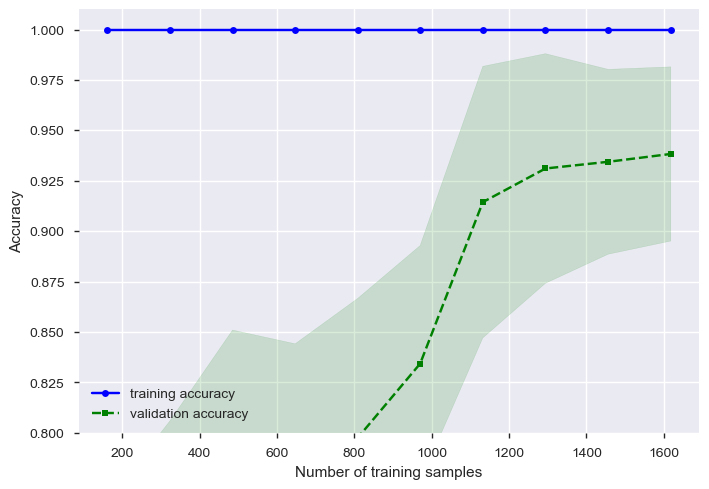

In [55]:
#Plot learning curve
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)


In [56]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2)
    gs_clf = gs_clf.fit(x_train2, y_train_smt)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, x_2, y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\n')
    
    #Feature Importance - optimized
    print('Feature Importances')
    for name, score in zip(list(dataset2),gs_clf.best_estimator_.named_steps['clf'].feature_importances_):
        print(name, round(score,2))
    
    #Output Validation Statistics
    target_names=['Class 0','Class 1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')

In [57]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)


Feature Importances
PMCno 0.06
DBH 0.1
Ht 0.1
Surv 0.08
Vig 0.3
Ins_res 0.06
Stem_Fm 0.13
Crown_Fm 0.13
Brnch_Fm 0.05

Best Parameters: {'clf__bootstrap': False, 'clf__max_features': 'auto', 'clf__n_estimators': 150}

 [[ 63 162]
 [  0  42]]

               precision    recall  f1-score   support

     Class 0       1.00      0.28      0.44       225
     Class 1       0.21      1.00      0.34        42

    accuracy                           0.39       267
   macro avg    

In [59]:
#Gridsearch Setup
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Cross Validation
cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)

#Parameter Grid
param_grid = [{'Logistic__C': [0.01, 0.1, 1, 10, 100],
               'Logistic__penalty': ['l1', 'l2']}]

param_grid2 = [{'meta_classifier__C': [0.01, 0.1, 1, 10, 100],
               'meta_classifier__penalty': ['l1', 'l2']}]

In [61]:
#Importing Libraries
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [63]:
#Create Stacking Model
from mlxtend.classifier import StackingCVClassifier

#Identify Models
lr = LogisticRegression(solver='liblinear',class_weight='balanced',
                            random_state=100)
mod1 = RandomForestClassifier(n_estimators=100,random_state=100)
mod2 = GradientBoostingClassifier(random_state=100)

#Create Stacking Classifier
np.random.seed(100)
stackmod=StackingCVClassifier(classifiers=[mod1,mod2],
                             meta_classifier=lr)

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

print('\nStacking Model')
for clf in (mod1,mod2,stackmod):
    rkfcv= clf.fit(x_train2,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate (rkfcv, x_2, y, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))  


Stacking Model
RandomForestClassifier 0.72
GradientBoostingClassifier 0.74
StackingCVClassifier 0.76


In [64]:
#Gridsearch - Stacking (Optional - takes about 10 min.)

gs2 = GridSearchCV(estimator=stackmod, 
                  param_grid=param_grid2, 
                  scoring='accuracy', cv=cv2)

gs_clf2 = gs2.fit(x_train2,y_train_smt)

model2 = gs_clf2.best_estimator_

#Nested CV
scoreACC2 = cross_val_score(gs_clf2, x_2, y,scoring='accuracy', 
                           cv=5,n_jobs= -1)
    
scorePM2 = cross_val_score(gs_clf2, x_2, y,scoring='precision_weighted', 
                          cv=5,n_jobs= -1)
    
scoreRM2 = cross_val_score(gs_clf2, x_2, y,scoring='recall_weighted', 
                          cv=5, n_jobs= -1)

# Use best model and test data for final evaluation
y_pred2 = model2.predict(x_test2)
    
#Identify Best Parameters to Optimize the Model
bestpara=str(gs_clf2.best_params_)

print('\nOptimized Stacking Classifier')
print('\nBest Parameters:',bestpara)
print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC2),np.std(scoreACC2)))
print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM2),np.std(scorePM2)))
print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM2),np.std(scoreRM2)))


Optimized Stacking Classifier

Best Parameters: {'meta_classifier__C': 10, 'meta_classifier__penalty': 'l2'}

NestedCV Accuracy(weighted) :0.89 +/-0.02 
NestedCV Precision(weighted) :0.89 +/-0.02 
NestedCV Recall(weighted) :0.89 +/-0.02 
